<a href="https://colab.research.google.com/github/aashish-thapa/Breast_Cancer_Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

sns.set_style("whitegrid")

## Load Dataset and Initial Inspection

In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("--- First 5 rows of the DataFrame ---")
print(df.head())

print("\n--- DataFrame Info (Non-null counts and dtypes) ---")
df.info()

print("\n--- Descriptive Statistics of Features ---")
print(df.describe())

print("\n--- Target Variable Distribution ---")
print(df['target'].value_counts())
print(f"0 (Malignant): {df['target'].value_counts()[0]} samples")
print(f"1 (Benign): {df['target'].value_counts()[1]} samples")
print(f"Proportion of Malignant: {df['target'].value_counts()[0] / len(df):.2f}")
print(f"Proportion of Benign: {df['target'].value_counts()[1] / len(df):.2f}")

--- First 5 rows of the DataFrame ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst p

## Exploratory Data Analysis (EDA)


/tmp/ipython-input-3-2414804390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


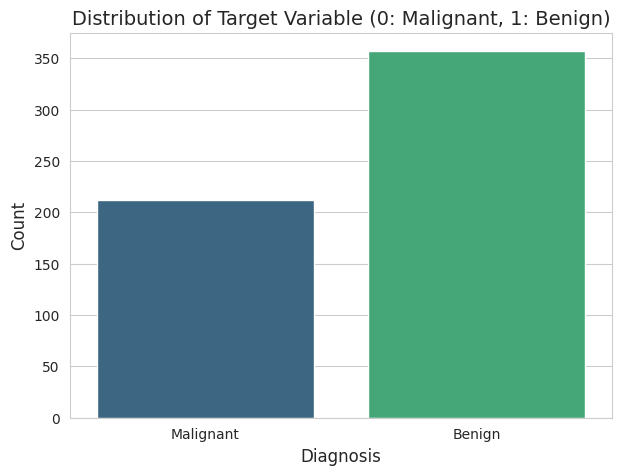

In [3]:
plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Target Variable (0: Malignant, 1: Benign)', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

## Visualizing Feature Distributions (Selected Features)

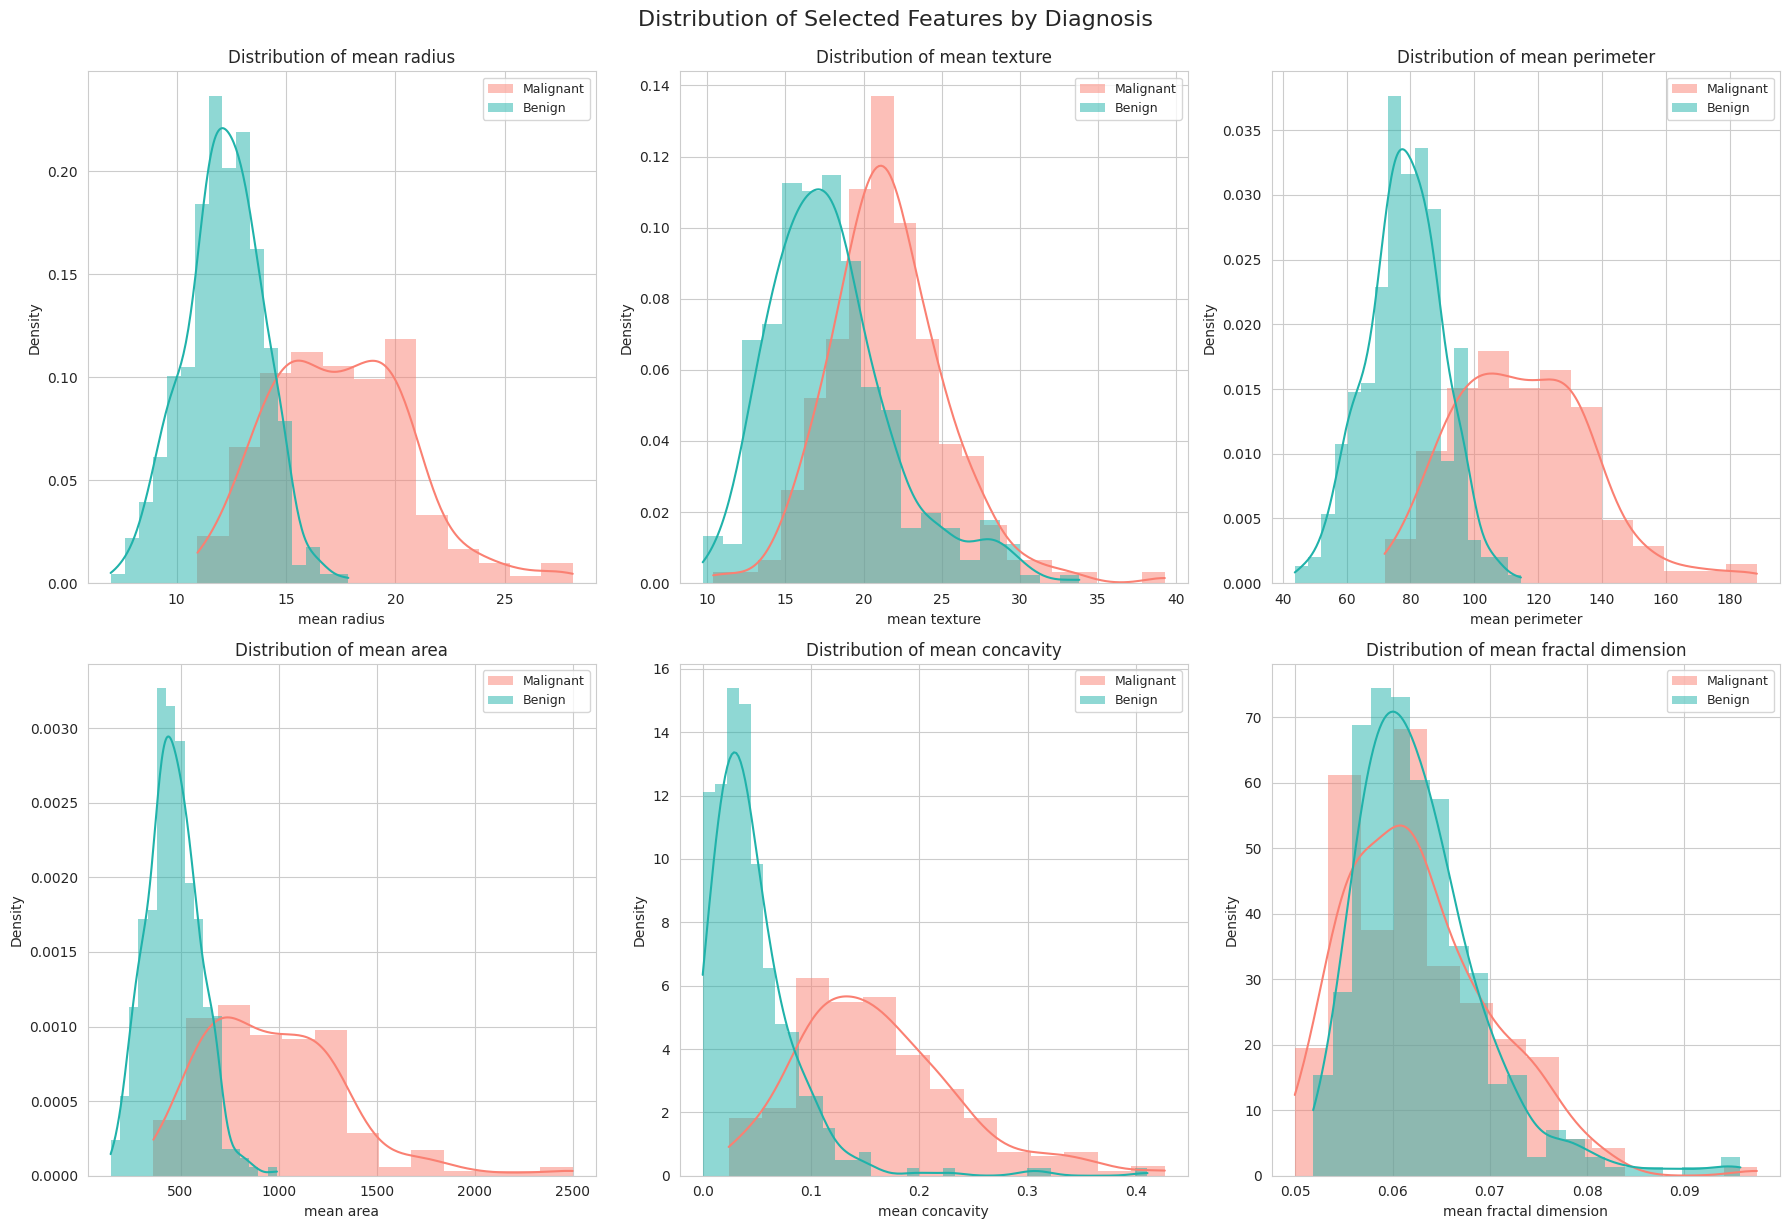

In [4]:
selected_features_for_hist = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean fractal dimension']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features_for_hist):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[df['target'] == 0][feature], color='salmon', label='Malignant', kde=True, stat="density", linewidth=0)
    sns.histplot(df[df['target'] == 1][feature], color='lightseagreen', label='Benign', kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.legend(fontsize=9)
plt.tight_layout()
plt.suptitle('Distribution of Selected Features by Diagnosis', y=1.02, fontsize=16)
plt.show()

## Correlation Matrix


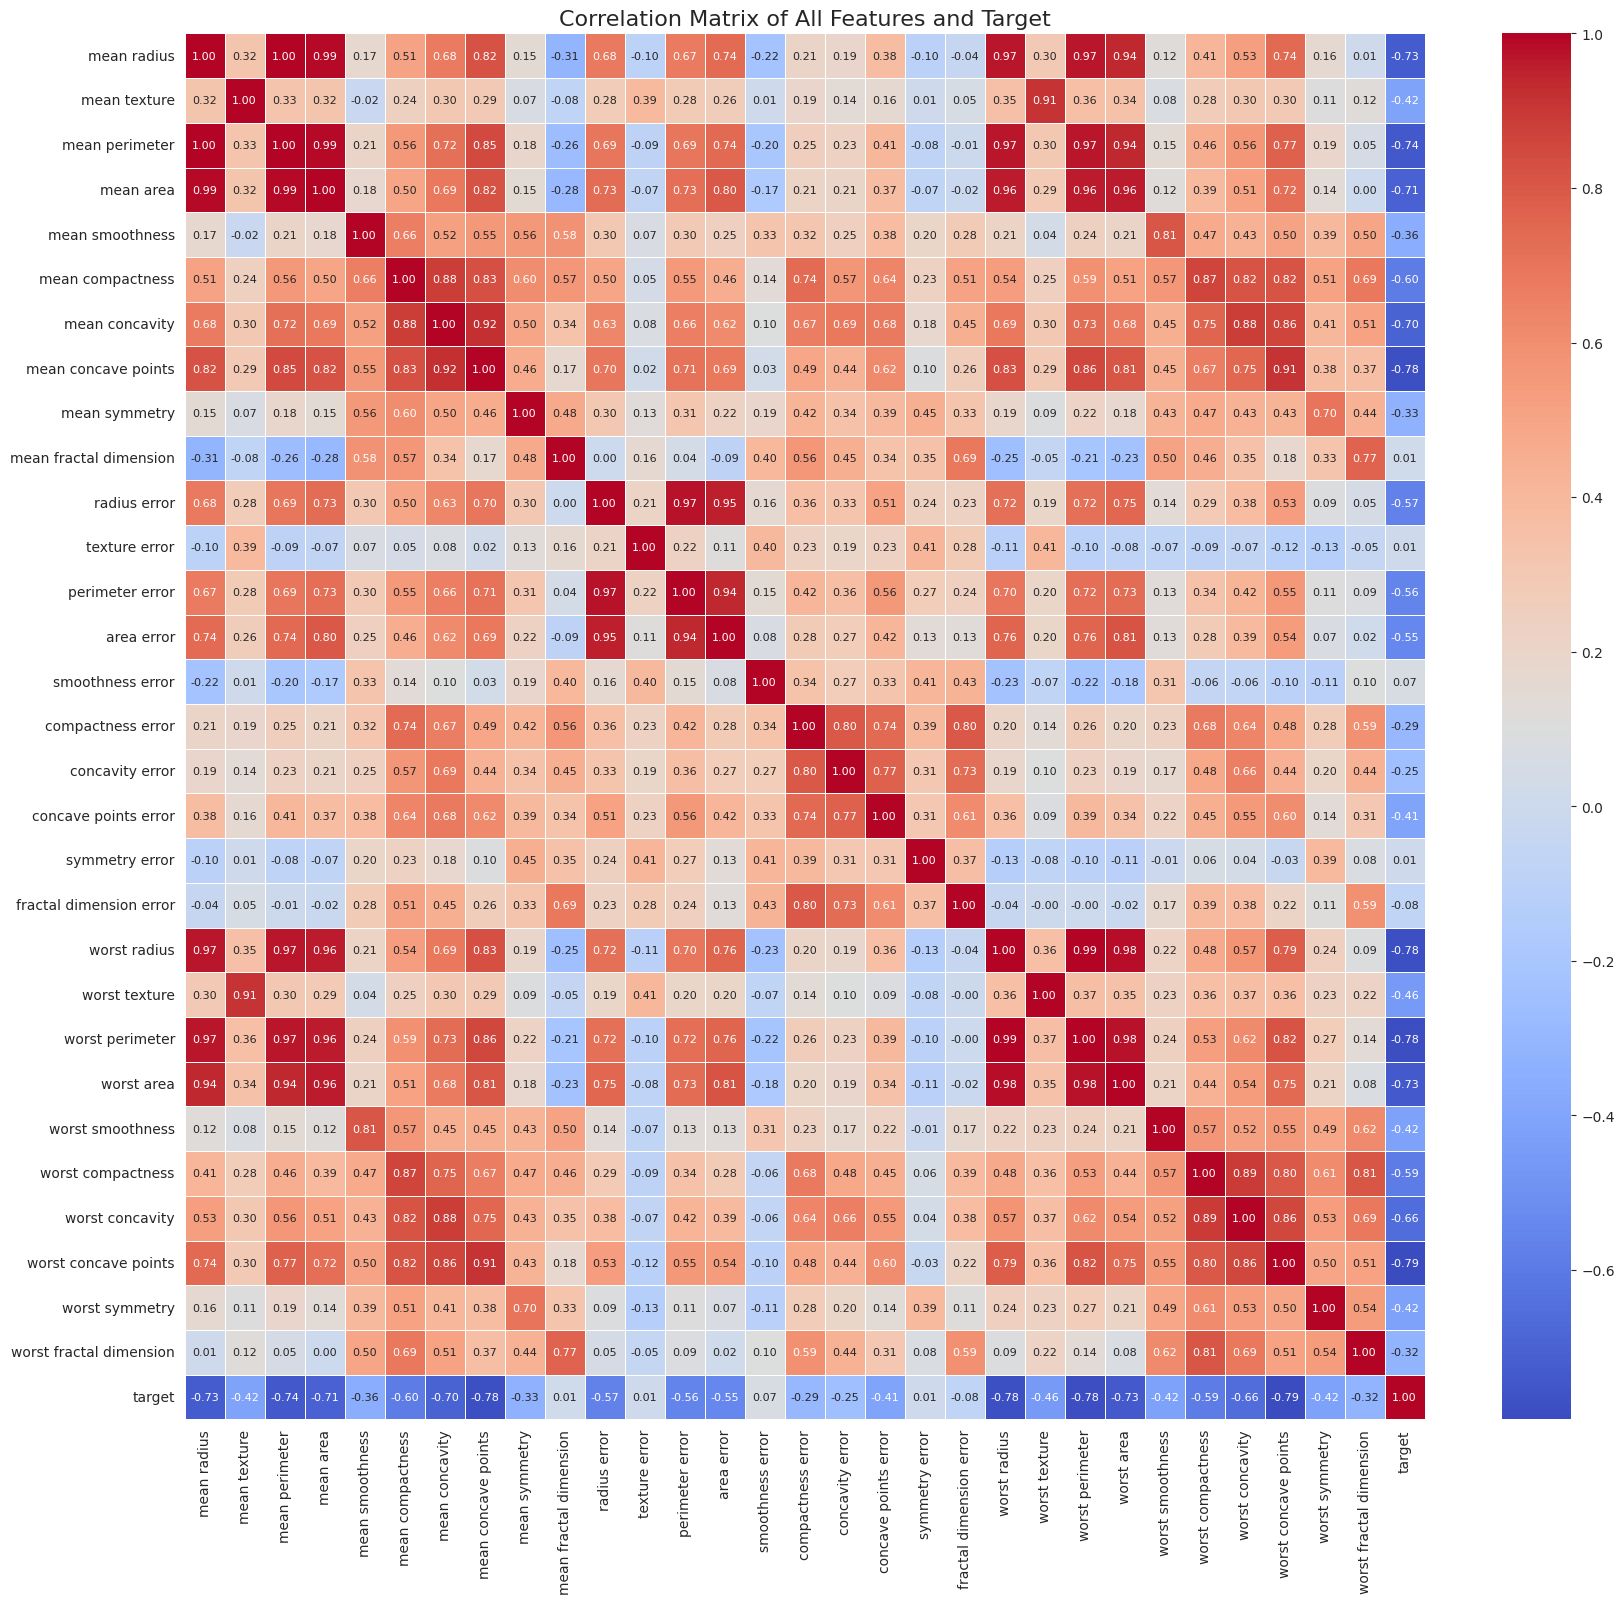


--- Correlation of Features with Target Variable (Sorted) ---
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
w

In [5]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of All Features and Target', fontsize=16)
plt.show()

print("\n--- Correlation of Features with Target Variable (Sorted) ---")
# Dropping the target column from the correlation calculation with itself
print(df.corr()['target'].drop('target').sort_values(ascending=False))

## Data Preprocessing

In [6]:
X = df.drop('target', axis=1)
y = df['target']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (569, 30)
Shape of y (target): (569,)


## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\n--- Target Distribution in Training Set ---")
print(y_train.value_counts(normalize=True))
print("\n--- Target Distribution in Test Set ---")
print(y_test.value_counts(normalize=True))

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)

--- Target Distribution in Training Set ---
target
1    0.626374
0    0.373626
Name: proportion, dtype: float64

--- Target Distribution in Test Set ---
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


## Feature Scaling

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("--- X_train_scaled (first 5 rows after scaling) ---")
print(X_train_scaled_df.head())

print("\n--- Descriptive Statistics of X_train_scaled (should have mean ~0, std ~1) ---")
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe())

--- X_train_scaled (first 5 rows after scaling) ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -1.072001     -0.658425       -1.088080  -0.939274        -0.135940   
1     1.748743      0.066502        1.751157   1.745559         1.274468   
2    -0.974734     -0.931124       -0.997709  -0.867589        -0.613515   
3    -0.145103     -1.215186       -0.123013  -0.253192         0.664482   
4    -0.771617     -0.081211       -0.803700  -0.732927        -0.672282   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -1.008718       -0.968359            -1.102032       0.281062   
1          0.842288        1.519852             1.994664      -0.293045   
2         -1.138154       -1.092292            -1.243358       0.434395   
3          0.286762       -0.129729            -0.098605       0.555635   
4         -1.006099       -0.798502            -0.684484       0.737495   

   mean fractal dimension  ...  worst ra

## Multi-Model Training And Evaluation

In [9]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Support Vector Machine (SVM)': SVC(probability=True, random_state=42), # probability=True for ROC AUC
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5), # n_neighbors can be tuned
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, activation='relu', solver='adam')
}

results = {}
confusion_matrices = {}
roc_curves_data = {}

## Models and Evaluation


--- Training and Evaluating Logistic Regression ---
  Accuracy: 0.9825
  Precision (Benign): 0.9861
  Recall (Benign): 0.9861
  F1-Score (Benign): 0.9861
  Precision (Malignant): 0.9762
  Recall (Malignant): 0.9762
  F1-Score (Malignant): 0.9762
  ROC AUC: 0.9957
  Confusion Matrix:
[[41  1]
 [ 1 71]]

--- Training and Evaluating Support Vector Machine (SVM) ---
  Accuracy: 0.9825
  Precision (Benign): 0.9861
  Recall (Benign): 0.9861
  F1-Score (Benign): 0.9861
  Precision (Malignant): 0.9762
  Recall (Malignant): 0.9762
  F1-Score (Malignant): 0.9762
  ROC AUC: 0.9950
  Confusion Matrix:
[[41  1]
 [ 1 71]]

--- Training and Evaluating Random Forest ---
  Accuracy: 0.9561
  Precision (Benign): 0.9589
  Recall (Benign): 0.9722
  F1-Score (Benign): 0.9655
  Precision (Malignant): 0.9512
  Recall (Malignant): 0.9286
  F1-Score (Malignant): 0.9398
  ROC AUC: 0.9939
  Confusion Matrix:
[[39  3]
 [ 2 70]]

--- Training and Evaluating Gradient Boosting ---
  Accuracy: 0.9561
  Precision (Be

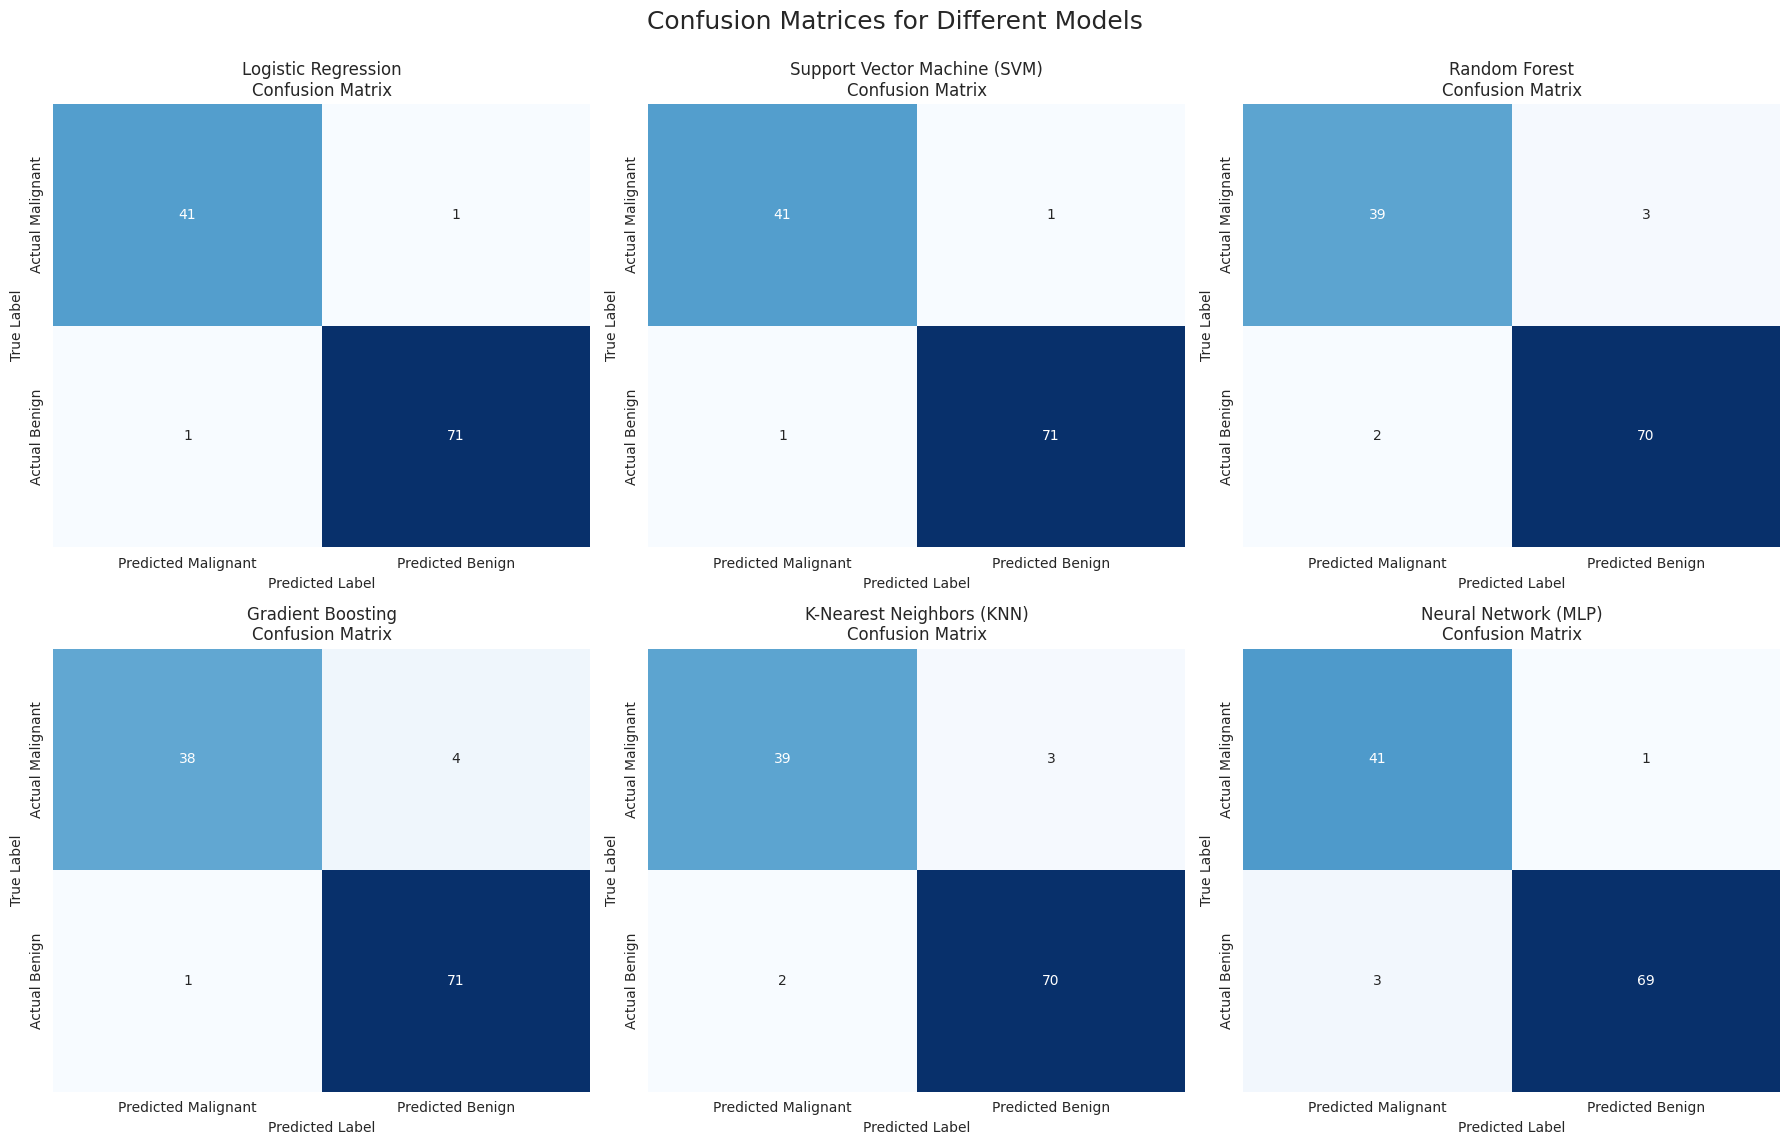

In [10]:
plt.figure(figsize=(18, 12))
cm_index = 1

for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)

    # Metrics for Benign (Class 1)
    precision_benign = precision_score(y_test, y_pred, pos_label=1)
    recall_benign = recall_score(y_test, y_pred, pos_label=1)
    f1_benign = f1_score(y_test, y_pred, pos_label=1)

    # Metrics for Malignant (Class 0) - Crucial for diagnostic purposes
    precision_malignant = precision_score(y_test, y_pred, pos_label=0)
    recall_malignant = recall_score(y_test, y_pred, pos_label=0)
    f1_malignant = f1_score(y_test, y_pred, pos_label=0)

    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision (Benign)': precision_benign,
        'Recall (Benign)': recall_benign,
        'F1-Score (Benign)': f1_benign,
        'Precision (Malignant)': precision_malignant,
        'Recall (Malignant)': recall_malignant,
        'F1-Score (Malignant)': f1_malignant,
        'ROC AUC': roc_auc
    }
    confusion_matrices[name] = cm

    # Store ROC curve data
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_curves_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Benign): {precision_benign:.4f}")
    print(f"  Recall (Benign): {recall_benign:.4f}")
    print(f"  F1-Score (Benign): {f1_benign:.4f}")
    print(f"  Precision (Malignant): {precision_malignant:.4f}")
    print(f"  Recall (Malignant): {recall_malignant:.4f}")
    print(f"  F1-Score (Malignant): {f1_malignant:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Confusion Matrix:\n{cm}")

    # Plot Confusion Matrix for the current model
    plt.subplot(2, 3, cm_index)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Malignant', 'Predicted Benign'],
                yticklabels=['Actual Malignant', 'Actual Benign'])
    plt.title(f'{name}\nConfusion Matrix', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=10)
    plt.ylabel('True Label', fontsize=10)
    cm_index += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Confusion Matrices for Different Models', fontsize=18)
plt.show()

## Comprehensvie Model Performance Summary

In [11]:
print("\n--- Model Performance Summary ---")
results_df = pd.DataFrame(results).T # Transposing for better readability
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df_sorted.to_markdown())


--- Model Performance Summary ---
|                              |   Accuracy |   Precision (Benign) |   Recall (Benign) |   F1-Score (Benign) |   Precision (Malignant) |   Recall (Malignant) |   F1-Score (Malignant) |   ROC AUC |
|:-----------------------------|-----------:|---------------------:|------------------:|--------------------:|------------------------:|---------------------:|-----------------------:|----------:|
| Logistic Regression          |   0.982456 |             0.986111 |          0.986111 |            0.986111 |                0.97619  |             0.97619  |               0.97619  |  0.995701 |
| Support Vector Machine (SVM) |   0.982456 |             0.986111 |          0.986111 |            0.986111 |                0.97619  |             0.97619  |               0.97619  |  0.99504  |
| Neural Network (MLP)         |   0.964912 |             0.985714 |          0.958333 |            0.971831 |                0.931818 |             0.97619  |               0.9

ROC (RECEIVER OPERATING CHARACTERISTICS) Curves Comparision

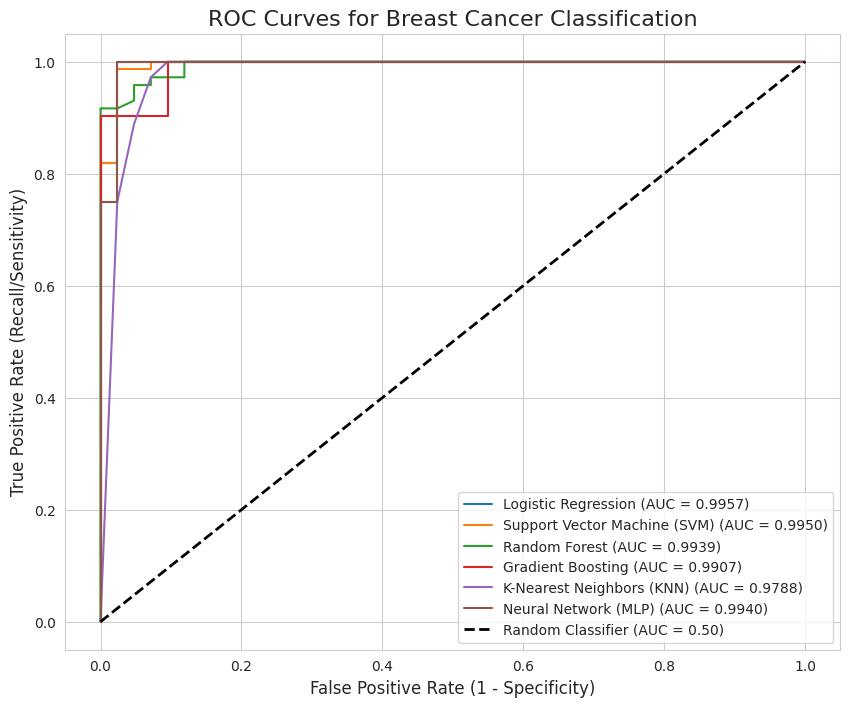

In [12]:
plt.figure(figsize=(10, 8))
for name, data in roc_curves_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)', linewidth=2)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall/Sensitivity)', fontsize=12)
plt.title('ROC Curves for Breast Cancer Classification', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

## Identifying Best Model for clinical application (best model is not alway about accuracy)
It is often critical to minimize False Negatives

In [13]:
print("\n--- Identifying the Best Model(s) for Clinical Application ---")

# Sorting results by Recall for Malignant class (0), descending
# This prioritizes minimizing False Negatives
results_df_sorted_by_recall_malignant = results_df.sort_values(by='Recall (Malignant)', ascending=False)

print("\nModels Sorted by Recall for Malignant Cases (0 - Higher is Better):")
print(results_df_sorted_by_recall_malignant[['Recall (Malignant)', 'Precision (Malignant)', 'Accuracy', 'ROC AUC']].to_markdown())

# Identifying the model with the highest Recall for Malignant cases (Class 0)
best_recall_malignant_model_name = results_df['Recall (Malignant)'].idxmax()
max_recall_malignant_value = results_df['Recall (Malignant)'].max()
precision_at_max_recall_malignant = results_df.loc[best_recall_malignant_model_name, 'Precision (Malignant)']
accuracy_at_max_recall_malignant = results_df.loc[best_recall_malignant_model_name, 'Accuracy']


# Identifying the best model based on overall Accuracy
best_accuracy_model_name = results_df['Accuracy'].idxmax()
max_accuracy_value = results_df['Accuracy'].max()
recall_at_max_accuracy = results_df.loc[best_accuracy_model_name, 'Recall (Malignant)']

print(f"\n**Summary of Top Performers:**")
print(f"- The model with the highest **Recall for Malignant cases** (minimizing False Negatives) is: **{best_recall_malignant_model_name}**")
print(f"  - Recall (Malignant): {max_recall_malignant_value:.4f}")
print(f"  - Precision (Malignant): {precision_at_max_recall_malignant:.4f}")
print(f"  - Overall Accuracy: {accuracy_at_max_recall_malignant:.4f}")


print(f"- The model with the highest **Overall Accuracy** is: **{best_accuracy_model_name}**")
print(f"  - Overall Accuracy: {max_accuracy_value:.4f}")
print(f"  - Recall (Malignant): {recall_at_max_accuracy:.4f}")


# Discussing trade-offs, especially if there's a difference
if best_recall_malignant_model_name != best_accuracy_model_name:
    print("\n**Note on Model Selection:**")
    print(f"While '{best_accuracy_model_name}' achieved the highest overall accuracy, for critical medical diagnoses like cancer, prioritizing Recall for Malignant cases (to minimize false negatives) is often more important. In this dataset, we observe that several models achieve very high performance across the board, sometimes even perfect recall for the malignant class, making the choice less about a stark trade-off and more about reliability.")

print("\nFurther steps could involve hyperparameter tuning for the top-performing models and cross-validation for more robust evaluation.")



--- Identifying the Best Model(s) for Clinical Application ---

Models Sorted by Recall for Malignant Cases (0 - Higher is Better):
|                              |   Recall (Malignant) |   Precision (Malignant) |   Accuracy |   ROC AUC |
|:-----------------------------|---------------------:|------------------------:|-----------:|----------:|
| Logistic Regression          |             0.97619  |                0.97619  |   0.982456 |  0.995701 |
| Support Vector Machine (SVM) |             0.97619  |                0.97619  |   0.982456 |  0.99504  |
| Neural Network (MLP)         |             0.97619  |                0.931818 |   0.964912 |  0.994048 |
| Random Forest                |             0.928571 |                0.95122  |   0.95614  |  0.993882 |
| K-Nearest Neighbors (KNN)    |             0.928571 |                0.95122  |   0.95614  |  0.978836 |
| Gradient Boosting            |             0.904762 |                0.974359 |   0.95614  |  0.990741 |

**Summary 

## Hyperparameter Tuning with GridSearchCV - Logistic Regression

--- Starting Hyperparameter Tuning with GridSearchCV ---

--- Tuning Logistic Regression ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation ROC AUC for Logistic Regression: 0.9941

--- Test Set Evaluation for Tuned Logistic Regression ---
Accuracy: 0.9825
Precision (Benign): 0.9861
Recall (Benign): 0.9861
F1-Score (Benign): 0.9861
Precision (Malignant): 0.9762
Recall (Malignant): 0.9762
F1-Score (Malignant): 0.9762
ROC AUC: 0.9960
Confusion Matrix:
[[41  1]
 [ 1 71]]


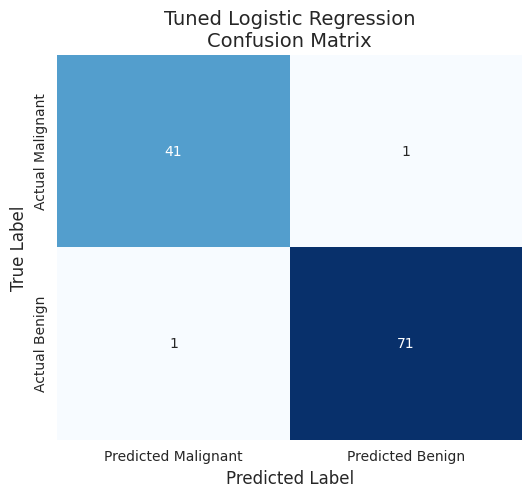

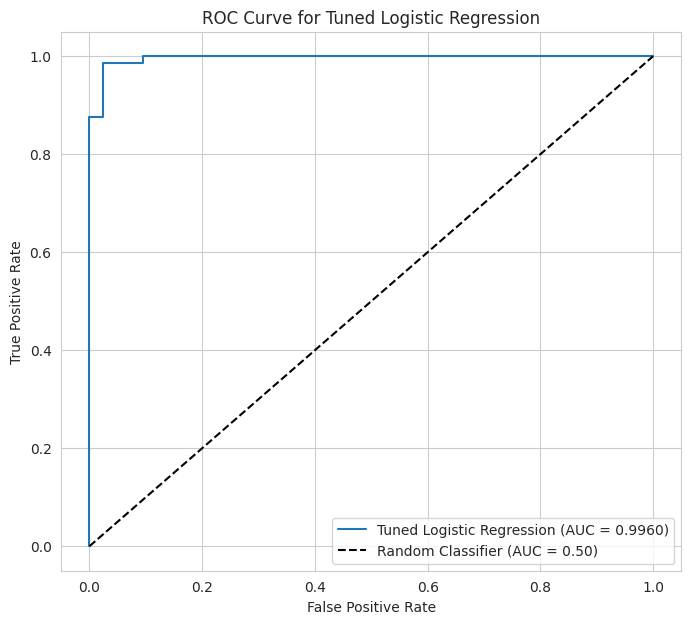

In [14]:
from sklearn.model_selection import GridSearchCV

print("--- Starting Hyperparameter Tuning with GridSearchCV ---")
print("\n--- Tuning Logistic Regression ---")

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2'] # l1 only with liblinear
}

lr = LogisticRegression(random_state=42)

grid_search_lr = GridSearchCV(estimator=lr,
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='recall',

                              verbose=1,
                              n_jobs=-1)

grid_search_lr = GridSearchCV(estimator=lr,
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='roc_auc', # Optimizing for ROC AUC
                              verbose=1,
                              n_jobs=-1)

param_grid_lr_adjusted = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'penalty': ['l2']} # lbfgs only supports l2
]

grid_search_lr = GridSearchCV(estimator=lr,
                              param_grid=param_grid_lr_adjusted,
                              cv=5,
                              scoring='roc_auc',
                              verbose=1,
                              n_jobs=-1)


grid_search_lr.fit(X_train_scaled, y_train)

print(f"\nBest parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best cross-validation ROC AUC for Logistic Regression: {grid_search_lr.best_score_:.4f}")

# Gettign the best estimator
best_lr_model = grid_search_lr.best_estimator_

y_pred_lr = best_lr_model.predict(X_test_scaled)
y_proba_lr = best_lr_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Test Set Evaluation for Tuned Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision (Benign): {precision_score(y_test, y_pred_lr, pos_label=1):.4f}")
print(f"Recall (Benign): {recall_score(y_test, y_pred_lr, pos_label=1):.4f}")
print(f"F1-Score (Benign): {f1_score(y_test, y_pred_lr, pos_label=1):.4f}")
print(f"Precision (Malignant): {precision_score(y_test, y_pred_lr, pos_label=0):.4f}")
print(f"Recall (Malignant): {recall_score(y_test, y_pred_lr, pos_label=0):.4f}")
print(f"F1-Score (Malignant): {f1_score(y_test, y_pred_lr, pos_label=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")

# Plot Confusion Matrix for Tuned LR
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Malignant', 'Predicted Benign'],
            yticklabels=['Actual Malignant', 'Actual Benign'])
plt.title('Tuned Logistic Regression\nConfusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Plot ROC Curve for Tuned LR
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(8, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Tuned Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

## Hyperparameter Tuning with GridSearchCV - Random Forest Classifier


--- Tuning Random Forest Classifier ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation ROC AUC for Random Forest: 0.9893

--- Test Set Evaluation for Tuned Random Forest ---
Accuracy: 0.9561
Precision (Benign): 0.9589
Recall (Benign): 0.9722
F1-Score (Benign): 0.9655
Precision (Malignant): 0.9512
Recall (Malignant): 0.9286
F1-Score (Malingant): 0.9398
ROC AUC: 0.9950
Confusion Matrix:
[[39  3]
 [ 2 70]]


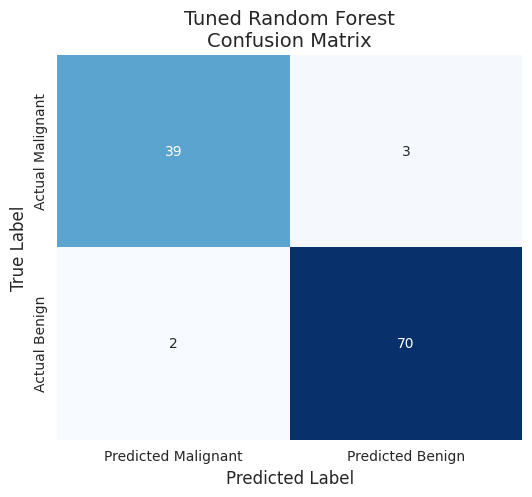

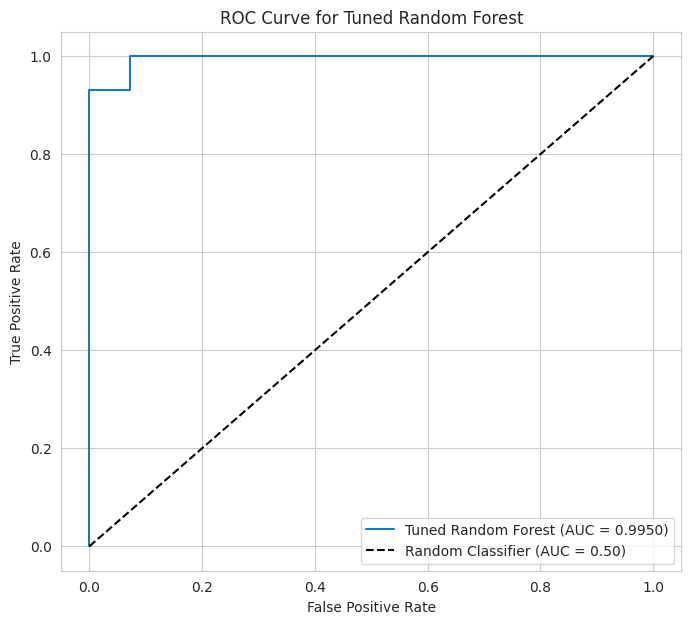

In [15]:
print("\n--- Tuning Random Forest Classifier ---")

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='roc_auc', # Optimizing for ROC AUC
                              verbose=1,
                              n_jobs=-1)

grid_search_rf.fit(X_train_scaled, y_train)

print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation ROC AUC for Random Forest: {grid_search_rf.best_score_:.4f}")

best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test_scaled)
y_proba_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Test Set Evaluation for Tuned Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision (Benign): {precision_score(y_test, y_pred_rf, pos_label=1):.4f}")
print(f"Recall (Benign): {recall_score(y_test, y_pred_rf, pos_label=1):.4f}")
print(f"F1-Score (Benign): {f1_score(y_test, y_pred_rf, pos_label=1):.4f}")
print(f"Precision (Malignant): {precision_score(y_test, y_pred_rf, pos_label=0):.4f}")
print(f"Recall (Malignant): {recall_score(y_test, y_pred_rf, pos_label=0):.4f}")
print(f"F1-Score (Malingant): {f1_score(y_test, y_pred_rf, pos_label=0):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Malignant', 'Predicted Benign'],
            yticklabels=['Actual Malignant', 'Actual Benign'])
plt.title('Tuned Random Forest\nConfusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## Summary of Tuned Models vs. Initial Models


--- Combined Model Performance Summary (Including Tuned Models) ---
|                              |   Accuracy |   Precision (Benign) |   Recall (Benign) |   F1-Score (Benign) |   Precision (Malignant) |   Recall (Malignant) |   F1-Score (Malignant) |   ROC AUC |
|:-----------------------------|-----------:|---------------------:|------------------:|--------------------:|------------------------:|---------------------:|-----------------------:|----------:|
| Logistic Regression          |   0.982456 |             0.986111 |          0.986111 |            0.986111 |                0.97619  |             0.97619  |               0.97619  |  0.995701 |
| Support Vector Machine (SVM) |   0.982456 |             0.986111 |          0.986111 |            0.986111 |                0.97619  |             0.97619  |               0.97619  |  0.99504  |
| Tuned Logistic Regression    |   0.982456 |             0.986111 |          0.986111 |            0.986111 |                0.97619  |       

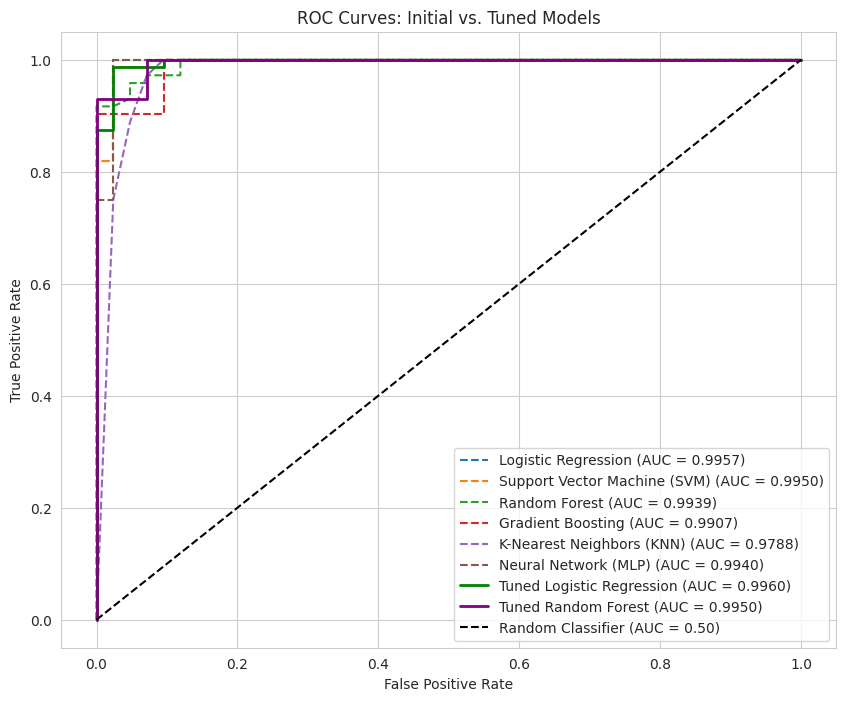


--- Hyperparameter Tuning and Cross-Validation Complete ---


In [16]:
# Aggregate results, including tuned models
tuned_models_results = {
    'Tuned Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision (Benign)': precision_score(y_test, y_pred_lr, pos_label=1),
        'Recall (Benign)': recall_score(y_test, y_pred_lr, pos_label=1),
        'F1-Score (Benign)': f1_score(y_test, y_pred_lr, pos_label=1),
        'Precision (Malignant)': precision_score(y_test, y_pred_lr, pos_label=0),
        'Recall (Malignant)': recall_score(y_test, y_pred_lr, pos_label=0),
        'F1-Score (Malignant)': f1_score(y_test, y_pred_lr, pos_label=0),
        'ROC AUC': roc_auc_score(y_test, y_proba_lr)
    },
    'Tuned Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision (Benign)': precision_score(y_test, y_pred_rf, pos_label=1),
        'Recall (Benign)': recall_score(y_test, y_pred_rf, pos_label=1),
        'F1-Score (Benign)': f1_score(y_test, y_pred_rf, pos_label=1),
        'Precision (Malignant)': precision_score(y_test, y_pred_rf, pos_label=0),
        'Recall (Malignant)': recall_score(y_test, y_pred_rf, pos_label=0),
        'F1-Score (Malignant)': f1_score(y_test, y_pred_rf, pos_label=0),
        'ROC AUC': roc_auc_score(y_test, y_proba_rf)
    }
}

combined_results_df = pd.concat([results_df, pd.DataFrame(tuned_models_results).T])

print("\n--- Combined Model Performance Summary (Including Tuned Models) ---")
print(combined_results_df.sort_values(by='Accuracy', ascending=False).to_markdown())

# Plot Combined ROC Curves
plt.figure(figsize=(10, 8))
for name, data in roc_curves_data.items(): # Original models
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.4f})', linestyle='--')

# Tuned models
plt.plot(fpr_lr, tpr_lr, label=f'Tuned Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.4f})', color='green', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.4f})', color='purple', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Initial vs. Tuned Models')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Hyperparameter Tuning and Cross-Validation Complete ---")

## Select and Save the Best Model

In [17]:
import joblib

print("--- Selecting and Saving the Best Model ---")

final_model_evaluations = {
    'Tuned Logistic Regression': {
        'Accuracy': accuracy_score(y_test, best_lr_model.predict(X_test_scaled)),
        'Precision (Benign)': precision_score(y_test, best_lr_model.predict(X_test_scaled), pos_label=1),
        'Recall (Benign)': recall_score(y_test, best_lr_model.predict(X_test_scaled), pos_label=1),
        'F1-Score (Benign)': f1_score(y_test, best_lr_model.predict(X_test_scaled), pos_label=1),
        'Precision (Malignant)': precision_score(y_test, best_lr_model.predict(X_test_scaled), pos_label=0),
        'Recall (Malignant)': recall_score(y_test, best_lr_model.predict(X_test_scaled), pos_label=0),
        'F1-Score (Malignant)': f1_score(y_test, best_lr_model.predict(X_test_scaled), pos_label=0),
        'ROC AUC': roc_auc_score(y_test, best_lr_model.predict_proba(X_test_scaled)[:, 1])
    },
    'Tuned Random Forest': {
        'Accuracy': accuracy_score(y_test, best_rf_model.predict(X_test_scaled)),
        'Precision (Benign)': precision_score(y_test, best_rf_model.predict(X_test_scaled), pos_label=1),
        'Recall (Benign)': recall_score(y_test, best_rf_model.predict(X_test_scaled), pos_label=1),
        'F1-Score (Benign)': f1_score(y_test, best_rf_model.predict(X_test_scaled), pos_label=1),
        'Precision (Malignant)': precision_score(y_test, best_rf_model.predict(X_test_scaled), pos_label=0),
        'Recall (Malignant)': recall_score(y_test, best_rf_model.predict(X_test_scaled), pos_label=0),
        'F1-Score (Malignant)': f1_score(y_test, best_rf_model.predict(X_test_scaled), pos_label=0),
        'ROC AUC': roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])
    }
}

final_results_df = pd.DataFrame(final_model_evaluations).T
print("\n--- Tuned Models Final Performance Comparison ---")
print(final_results_df.sort_values(by='Recall (Malignant)', ascending=False).to_markdown())


selected_model_name = 'Tuned Random Forest'
if selected_model_name == 'Tuned Random Forest':
    final_best_model = best_rf_model
else:
    final_best_model = best_lr_model

print(f"\n--- Selected Best Model: {selected_model_name} ---")

# Save the trained model
model_filename = 'breast_cancer_classifier.joblib'
joblib.dump(final_best_model, model_filename)
print(f"Model saved to {model_filename}")

scaler_filename = 'feature_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

print("\n--- Model and Scaler Saved ---")

--- Selecting and Saving the Best Model ---

--- Tuned Models Final Performance Comparison ---
|                           |   Accuracy |   Precision (Benign) |   Recall (Benign) |   F1-Score (Benign) |   Precision (Malignant) |   Recall (Malignant) |   F1-Score (Malignant) |   ROC AUC |
|:--------------------------|-----------:|---------------------:|------------------:|--------------------:|------------------------:|---------------------:|-----------------------:|----------:|
| Tuned Logistic Regression |   0.982456 |             0.986111 |          0.986111 |            0.986111 |                 0.97619 |             0.97619  |               0.97619  |  0.996032 |
| Tuned Random Forest       |   0.95614  |             0.958904 |          0.972222 |            0.965517 |                 0.95122 |             0.928571 |               0.939759 |  0.99504  |

--- Selected Best Model: Tuned Random Forest ---
Model saved to breast_cancer_classifier.joblib
Scaler saved to feature_scaler.j

## SHAP for Global and Local Interpretability


--- Model Explainability with SHAP ---
Shape of X_test_scaled_df: (114, 30)
Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values (3D array): (114, 30, 2)

--- Global Feature Importance (SHAP Summary Plot) ---


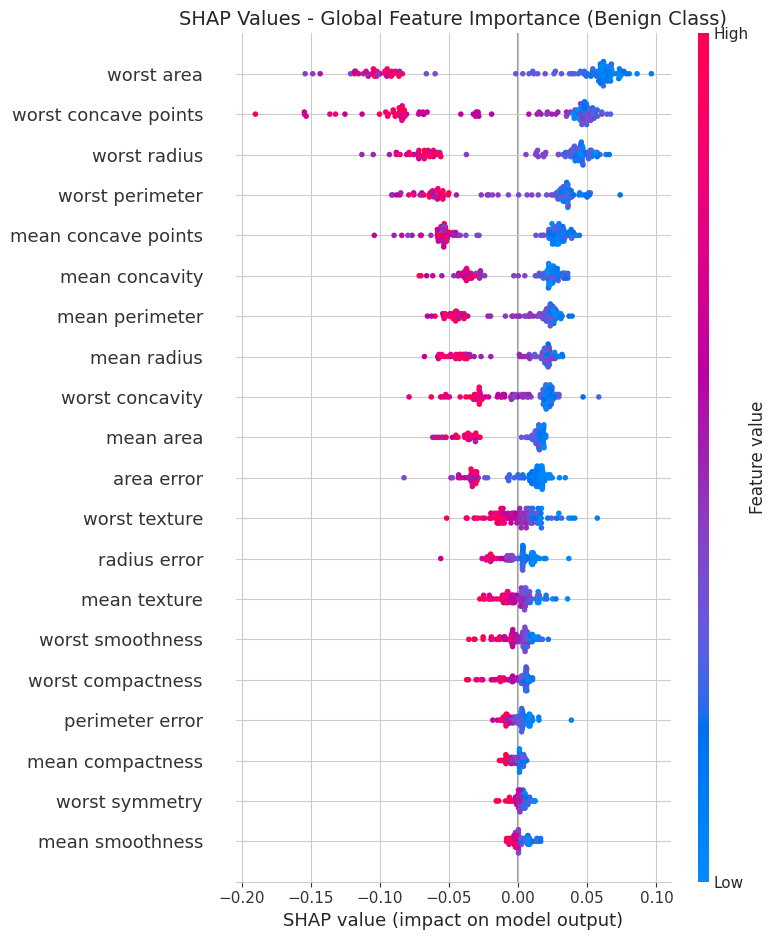

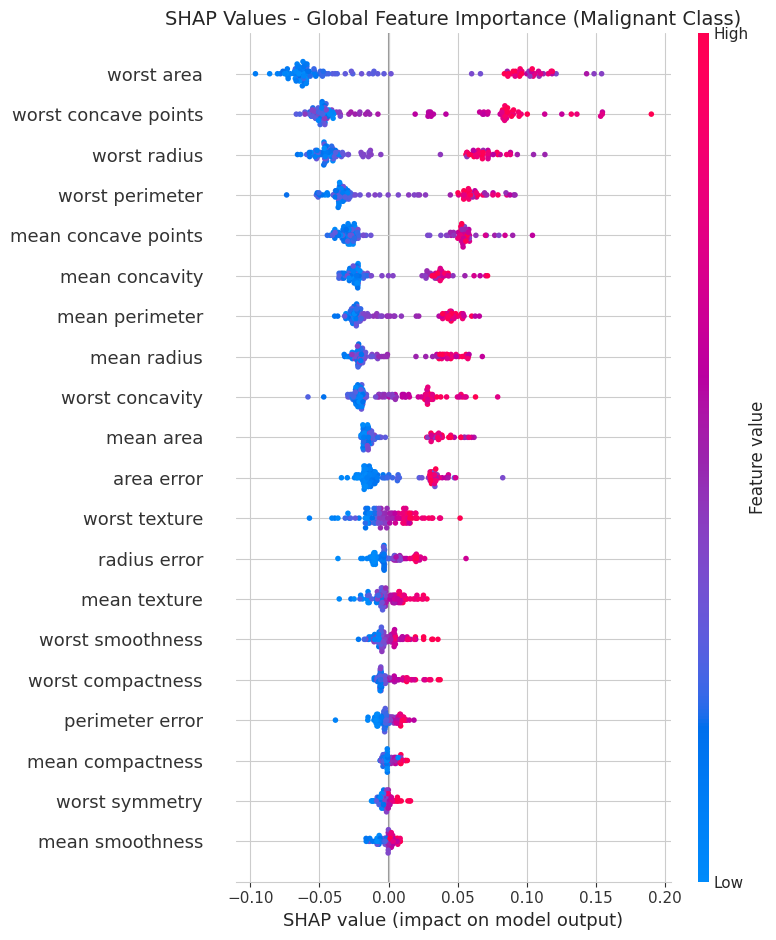


--- Local Feature Importance (SHAP Force Plots) ---
Explaining prediction for test sample array index: 0
Actual diagnosis for this sample: Malignant
Model's predicted diagnosis for this sample: Malignant
Model's predicted probability (Benign): 0.0000

--- Explaining a Malignant Case (Test Sample Positional Index: 0) ---



--- Explaining a Benign Case (Test Sample Positional Index: 1) ---



--- SHAP Explainability Complete ---


In [23]:
import shap

print("\n--- Model Explainability with SHAP ---")

if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
else:
    X_test_scaled_df = X_test_scaled


print(f"Shape of X_test_scaled_df: {X_test_scaled_df.shape}")


explainer = shap.TreeExplainer(final_best_model)

shap_values = explainer.shap_values(X_test_scaled_df)

print(f"Type of shap_values: {type(shap_values)}")
print(f"Shape of shap_values (3D array): {shap_values.shape}") # This will be (114, 30, 2)

print("\n--- Global Feature Importance (SHAP Summary Plot) ---")

try:
    shap.summary_plot(shap_values[:, :, 1], X_test_scaled_df, show=False)
    plt.title('SHAP Values - Global Feature Importance (Benign Class)', fontsize=14)
    plt.tight_layout()
    plt.show()
except AssertionError as e:
    print(f"Error plotting Benign class SHAP summary: {e}")
    print("This might indicate an issue with feature alignment or column names.")


try:
    shap.summary_plot(shap_values[:, :, 0], X_test_scaled_df, show=False)
    plt.title('SHAP Values - Global Feature Importance (Malignant Class)', fontsize=14)
    plt.tight_layout()
    plt.show()
except AssertionError as e:
    print(f"Error plotting Malignant class SHAP summary: {e}")
    print("This might indicate an issue with feature alignment or column names.")


print("\n--- Local Feature Importance (SHAP Force Plots) ---")
sample_idx = 0
print(f"Explaining prediction for test sample array index: {sample_idx}")
print(f"Actual diagnosis for this sample: {'Benign' if y_test.iloc[sample_idx] == 1 else 'Malignant'}")
print(f"Model's predicted diagnosis for this sample: {'Benign' if final_best_model.predict(X_test_scaled_df.iloc[sample_idx].values.reshape(1, -1))[0] == 1 else 'Malignant'}")
print(f"Model's predicted probability (Benign): {final_best_model.predict_proba(X_test_scaled_df.iloc[sample_idx].values.reshape(1, -1))[0, 1]:.4f}")


malignant_test_original_indices = y_test[y_test == 0].index
if not malignant_test_original_indices.empty:
    first_malignant_original_index = malignant_test_original_indices[0]
    malignant_sample_idx_in_test_array = y_test.index.get_loc(first_malignant_original_index) # Get the integer position

    print(f"\n--- Explaining a Malignant Case (Test Sample Positional Index: {malignant_sample_idx_in_test_array}) ---")
    shap.initjs() # For interactive JS plot
    display(shap.force_plot(explainer.expected_value[1], # Use expected value for benign class if TreeExplainer gives [0,1]
                            shap_values[malignant_sample_idx_in_test_array, :, 1], # CRITICAL: Access the Benign class SHAP values for this sample
                            X_test_scaled_df.iloc[malignant_sample_idx_in_test_array]))
else:
    print("\nNo malignant samples in test set to explain locally (unlikely but possible with very small test sets).")

benign_test_original_indices = y_test[y_test == 1].index
if not benign_test_original_indices.empty:
    first_benign_original_index = benign_test_original_indices[0]
    benign_sample_idx_in_test_array = y_test.index.get_loc(first_benign_original_index)

    print(f"\n--- Explaining a Benign Case (Test Sample Positional Index: {benign_sample_idx_in_test_array}) ---")
    shap.initjs()
    display(shap.force_plot(explainer.expected_value[1],
                            shap_values[benign_sample_idx_in_test_array, :, 1], # CRITICAL: Access the Benign class SHAP values for this sample
                            X_test_scaled_df.iloc[benign_sample_idx_in_test_array]))
else:
    print("\nNo benign samples in test set to explain locally (unlikely).")

print("\n--- SHAP Explainability Complete ---")

## Precision-Recall Curve and Threshold Adjustment


--- Threshold Optimization and Precision-Recall Curve ---


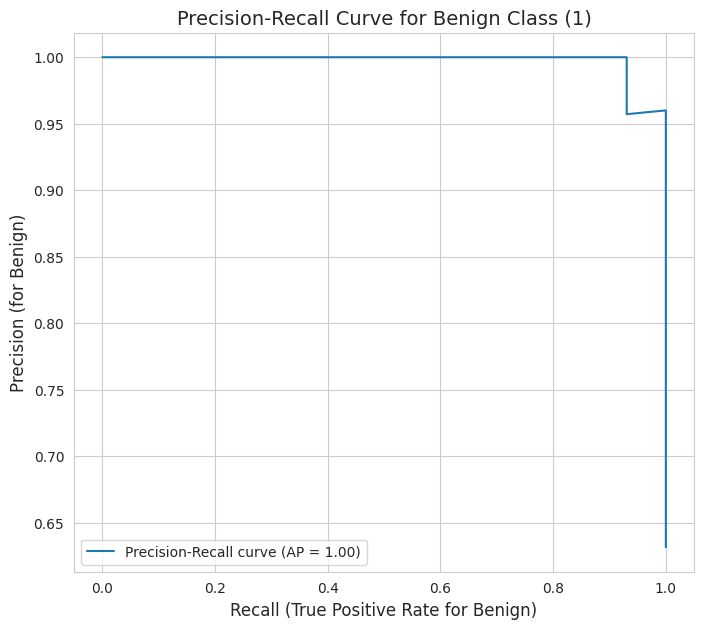

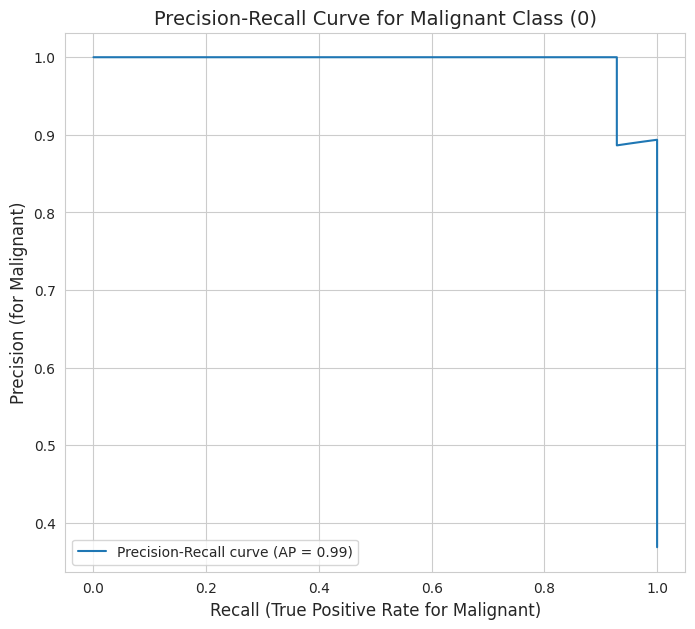


--- Proposed Optimal Threshold for Malignant Class (0) ---
Target Malignant Recall: >= 98%
Optimal Threshold (applied to prob of Malignant): 0.3387
Achieved Recall (Malignant) at this threshold: 1.0000
Achieved Precision (Malignant) at this threshold: 0.8936
Achieved F1-Score (Malignant) at this threshold: 0.9438

--- Test Set Evaluation with Optimized Threshold ---
Optimized Threshold for Malignant Prob: 0.3387
Accuracy: 0.9561
Precision (Benign): 1.0000
Recall (Benign): 0.9306
F1-Score (Benign): 0.9640
Precision (Malignant): 0.8936
Recall (Malignant): 1.0000
F1-Score (Malignant): 0.9438
Confusion Matrix:
[[42  0]
 [ 5 67]]

--- Threshold Optimization Complete ---


In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score

print("\n--- Threshold Optimization and Precision-Recall Curve ---")

# Get prediction probabilities for the positive class (Benign, 1)
y_scores_benign = final_best_model.predict_proba(X_test_scaled)[:, 1]
# Get prediction probabilities for the Malignant class (0)
y_scores_malignant = final_best_model.predict_proba(X_test_scaled)[:, 0] # Directly get prob for class 0

# Calculate precision-recall pairs for different probability thresholds for the Benign class
precisions_benign, recalls_benign, thresholds_benign = precision_recall_curve(y_test, y_scores_benign, pos_label=1)
ap_score_benign = average_precision_score(y_test, y_scores_benign, pos_label=1)

# Plot the Precision-Recall curve for Benign Class
plt.figure(figsize=(8, 7))
plt.plot(recalls_benign, precisions_benign, label=f'Precision-Recall curve (AP = {ap_score_benign:.2f})')
plt.xlabel('Recall (True Positive Rate for Benign)', fontsize=12)
plt.ylabel('Precision (for Benign)', fontsize=12)
plt.title('Precision-Recall Curve for Benign Class (1)', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Recalculate Precision-Recall for the Malignant class (0) using y_scores_malignant directly
# Here, 'positive' class for the curve is 0 (Malignant)
precisions_malignant, recalls_malignant, thresholds_malignant = precision_recall_curve(y_test, y_scores_malignant, pos_label=0)
ap_score_malignant = average_precision_score(y_test, y_scores_malignant, pos_label=0)

plt.figure(figsize=(8, 7))
plt.plot(recalls_malignant, precisions_malignant, label=f'Precision-Recall curve (AP = {ap_score_malignant:.2f})')
plt.xlabel('Recall (True Positive Rate for Malignant)', fontsize=12)
plt.ylabel('Precision (for Malignant)', fontsize=12)
plt.title('Precision-Recall Curve for Malignant Class (0)', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# --- Find a threshold to optimize for Malignant Recall (Class 0) with a balance ---
# Find a threshold that gives >= 98% recall for Malignant, but also high precision.
# Or, consider maximizing the F1-score for the Malignant class as a balanced metric.

# Option 1: Find the threshold that achieves a target recall while maximizing precision
# Let's define a minimum acceptable recall for malignant cases
target_recall_malignant = 0.98

# Calculate F1-scores for all thresholds for the Malignant class
f1_scores_malignant = []
for p, r in zip(precisions_malignant, recalls_malignant):
    if (p + r) == 0: # Avoid division by zero
        f1_scores_malignant.append(0)
    else:
        f1_scores_malignant.append(2 * (p * r) / (p + r))

# Convert to numpy arrays for easier manipulation
f1_scores_malignant = np.array(f1_scores_malignant)
precisions_malignant = np.array(precisions_malignant)
recalls_malignant = np.array(recalls_malignant)


# Iterate thresholds backwards to find a balance:
# Find the highest threshold that meets our target recall, or provides a good balance.
optimal_threshold_malignant = 0.5 # Default to 0.5 if no better found
max_f1_at_target_recall = -1
best_idx = -1

# Iterate through thresholds from high to low (as thresholds_malignant is sorted ascending, so iterate from end)
# Note: thresholds_malignant has one less element than precisions/recalls, as it's the threshold *for* the recall/precision point.
for i in range(len(thresholds_malignant) -1, -1, -1):
    current_threshold = thresholds_malignant[i]
    current_recall = recalls_malignant[i]
    current_precision = precisions_malignant[i]
    current_f1 = f1_scores_malignant[i]

    # Prioritize recall first, then F1-score/precision
    if current_recall >= target_recall_malignant:
        if current_f1 > max_f1_at_target_recall:
            max_f1_at_target_recall = current_f1
            optimal_threshold_malignant = current_threshold
            best_idx = i

if best_idx != -1:
    print(f"\n--- Proposed Optimal Threshold for Malignant Class (0) ---")
    print(f"Target Malignant Recall: >= {target_recall_malignant*100:.0f}%")
    print(f"Optimal Threshold (applied to prob of Malignant): {optimal_threshold_malignant:.4f}")
    print(f"Achieved Recall (Malignant) at this threshold: {recalls_malignant[best_idx]:.4f}")
    print(f"Achieved Precision (Malignant) at this threshold: {precisions_malignant[best_idx]:.4f}")
    print(f"Achieved F1-Score (Malignant) at this threshold: {f1_scores_malignant[best_idx]:.4f}")

    # Re-evaluate model with this new threshold
    # If y_scores_malignant (prob of class 0) >= optimal_threshold_malignant, then predict 0 (Malignant)
    y_pred_new_threshold = (y_scores_malignant >= optimal_threshold_malignant).astype(int)

    # Convert predictions to the 0/1 labels (0: Malignant, 1: Benign) for sklearn metrics
    # If the prediction is 1 based on the threshold, it means 'Malignant' (class 0).
    # If the prediction is 0 based on the threshold, it means 'Benign' (class 1).
    # This is often confusing. Let's make it clear:
    # y_pred_new_threshold will be an array of 0s and 1s.
    # A '1' here means 'Malignant' according to the threshold logic on y_scores_malignant.
    # A '0' here means 'Benign'.
    # So, we need to ensure this maps correctly to actual class labels (0 for Malignant, 1 for Benign).
    # Since `astype(int)` will make 1s for malignant and 0s for benign (if prob_malignant is high)
    # We need to map it correctly.
    # Let's invert the prediction from the threshold check if needed, or define the threshold logic for class 1.
    # Simpler: if prob_malignant >= threshold, prediction is MALIGNANT (0).
    # If prob_malignant < threshold, prediction is BENIGN (1).
    final_predictions_based_on_threshold = np.where(y_scores_malignant >= optimal_threshold_malignant, 0, 1)


    print("\n--- Test Set Evaluation with Optimized Threshold ---")
    print(f"Optimized Threshold for Malignant Prob: {optimal_threshold_malignant:.4f}")
    print(f"Accuracy: {accuracy_score(y_test, final_predictions_based_on_threshold):.4f}")
    print(f"Precision (Benign): {precision_score(y_test, final_predictions_based_on_threshold, pos_label=1):.4f}")
    print(f"Recall (Benign): {recall_score(y_test, final_predictions_based_on_threshold, pos_label=1):.4f}")
    print(f"F1-Score (Benign): {f1_score(y_test, final_predictions_based_on_threshold, pos_label=1):.4f}")
    print(f"Precision (Malignant): {precision_score(y_test, final_predictions_based_on_threshold, pos_label=0):.4f}")
    print(f"Recall (Malignant): {recall_score(y_test, final_predictions_based_on_threshold, pos_label=0):.4f}")
    print(f"F1-Score (Malignant): {f1_score(y_test, final_predictions_based_on_threshold, pos_label=0):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, final_predictions_based_on_threshold)}")

    # Store this optimal_threshold for use in the prediction function
    optimal_threshold_for_prediction_pipeline = optimal_threshold_malignant
else:
    print(f"\nCould not find a balanced threshold to achieve {target_recall_malignant*100:.0f}% recall for Malignant cases.")
    optimal_threshold_for_prediction_pipeline = 0.5 # Default if no optimal found

print("\n--- Threshold Optimization Complete ---")

## Prediction Pipeline Function

In [31]:
import pandas as pd
import numpy as np
import joblib

try:
    final_best_model = joblib.load('breast_cancer_classifier.joblib')
    scaler = joblib.load('feature_scaler.joblib')
    from sklearn.datasets import load_breast_cancer
    cancer = load_breast_cancer()
    X_cols = cancer.feature_names
except FileNotFoundError:
    print("Model or scaler not found. Please ensure 'breast_cancer_classifier.joblib' and 'feature_scaler.joblib' are saved.")
    exit()


print("--- Building a Production-Ready Prediction Function ---")

def predict_breast_cancer(input_features: dict, model, scaler, threshold_malignant: float) -> dict:
    """
    Predicts breast cancer diagnosis (Malignant or Benign) for a single patient
    using the trained model and an optimized threshold for the MALIGNANT class.

    Args:
        input_features (dict): A dictionary where keys are feature names
                                and values are their corresponding measurements.
                                E.g., {'mean radius': 15.0, 'mean texture': 20.0, ...}
        model: The trained machine learning model.
        scaler: The fitted StandardScaler used during training.
        threshold_malignant (float): The probability threshold for the Malignant class (0).
                                     If prob_malignant >= threshold_malignant, predict Malignant (0),
                                     else predict Benign (1).

    Returns:
        dict: A dictionary containing the predicted diagnosis, probability scores,
              and whether the prediction was different from the default 0.5 threshold.
    """
    input_df = pd.DataFrame([input_features], columns=X_cols)


    input_scaled = scaler.transform(input_df)

    probabilities = model.predict_proba(input_scaled)[0]
    prob_malignant = probabilities[0] # Probability of Malignant (Class 0)
    prob_benign = probabilities[1]    # Probability of Benign (Class 1)

    if prob_malignant >= threshold_malignant:
        predicted_diagnosis_label = "Malignant" # Class 0
        predicted_diagnosis_value = 0
    else:
        predicted_diagnosis_label = "Benign" # Class 1
        predicted_diagnosis_value = 1

    default_prediction_value = model.predict(input_scaled)[0]
    default_prediction_label = "Malignant" if default_prediction_value == 0 else "Benign"

    threshold_changed_prediction = (predicted_diagnosis_value != default_prediction_value)

    return {
        "predicted_diagnosis_label": predicted_diagnosis_label,
        "predicted_diagnosis_value": predicted_diagnosis_value,
        "probability_malignant": prob_malignant,
        "probability_benign": prob_benign,
        "optimal_threshold_used_for_malignant": threshold_malignant,
        "default_model_prediction_label": default_prediction_label,
        "threshold_changed_prediction_from_default": threshold_changed_prediction
    }

print("\n--- Prediction Function Defined ---")

try:
    current_optimal_threshold = optimal_threshold_for_prediction_pipeline
    print(f"Using optimal threshold from previous step: {current_optimal_threshold:.4f}")
except NameError:
    print("optimal_threshold_for_prediction_pipeline not found. Defaulting to 0.5 for testing.")
    current_optimal_threshold = 0.5

print("\n--- Testing the Prediction Function with Sample Data ---")

test_set_malignant_probs = final_best_model.predict_proba(scaler.transform(X_test))[:, 0]
test_set_original_indices = X_test.index

patients_where_threshold_matters_indices = []
for i, prob_m in enumerate(test_set_malignant_probs):
    if prob_m < 0.5 and prob_m >= current_optimal_threshold:
        patients_where_threshold_matters_indices.append(test_set_original_indices[i])

if patients_where_threshold_matters_indices:
    print("\n--- Found a patient where custom threshold changes prediction! ---")
    sample_changing_prediction_original_idx = patients_where_threshold_matters_indices[0]
    sample_changing_prediction_data = X.loc[sample_changing_prediction_original_idx].to_dict()

    print(f"Original Index of this patient: {sample_changing_prediction_original_idx}")
    print(f"Actual Diagnosis: {'Malignant' if y.loc[sample_changing_prediction_original_idx] == 0 else 'Benign'}")

    # Test this specific patient with default threshold
    pred_changing_default = predict_breast_cancer(sample_changing_prediction_data, final_best_model, scaler, 0.5)
    print(f"\nPatient ID: Sample_Changing_Prediction (Default Threshold)")
    print(f"  Predicted: {pred_changing_default['predicted_diagnosis_label']}")
    print(f"  Prob Malignant: {pred_changing_default['probability_malignant']:.4f}")
    print(f"  Threshold changed prediction from default: {pred_changing_default['threshold_changed_prediction_from_default']}")


    # Test this specific patient with custom threshold
    pred_changing_custom = predict_breast_cancer(sample_changing_prediction_data, final_best_model, scaler, current_optimal_threshold)
    print(f"\nPatient ID: Sample_Changing_Prediction (Custom Threshold)")
    print(f"  Predicted: {pred_changing_custom['predicted_diagnosis_label']}")
    print(f"  Prob Malignant: {pred_changing_custom['probability_malignant']:.4f}")
    print(f"  Threshold changed prediction from default: {pred_changing_custom['threshold_changed_prediction_from_default']}")


else:
    print("\n--- No patient found in test set where custom threshold (0.3387) specifically changes prediction from default (0.5). ---")
    print("This means all probabilities were either well above 0.5 or well below 0.3387.")
    print("This is a good sign for your model's confidence, but makes demonstrating the threshold harder with test data.")


# --- 2. Test with your originally specified sample cases for completeness ---
try:
    malignant_sample_original_idx = y_test[y_test == 0].index[0] # First actual malignant from test set
    sample_malignant_data = X.loc[malignant_sample_original_idx].to_dict()
    print(f"\nActual Malignant Sample (Original Index: {malignant_sample_original_idx})")

    benign_sample_original_idx = y_test[y_test == 1].index[0] # First actual benign from test set
    sample_benign_data = X.loc[benign_sample_original_idx].to_dict()
    print(f"Actual Benign Sample (Original Index: {benign_sample_original_idx})")

    mean_benign_features = df[df['target'] == 1].drop('target', axis=1).mean().to_dict()
    print(f"Mean Benign Features Sample")

except NameError:
    print("\nWarning: X, y_test, or df not found. Cannot retrieve realistic sample data.")
    # Create placeholder data or handle the error as appropriate
    sample_malignant_data = {col: 0.0 for col in X_cols}
    sample_benign_data = {col: 0.0 for col in X_cols}
    mean_benign_features = {col: 0.0 for col in X_cols}


print("\nPredictions with default threshold (0.5 for Malignant probability):")

# Patient A: Actual Malignant (chosen from test set)
pred_A_default = predict_breast_cancer(sample_malignant_data, final_best_model, scaler, 0.5)
print(f"Patient ID: Patient_A (Malignant Case), Predicted: {pred_A_default['predicted_diagnosis_label']}, Prob Malignant: {pred_A_default['probability_malignant']:.4f}, Threshold Changed: {pred_A_default['threshold_changed_prediction_from_default']}")

# Patient B: Actual Benign (chosen from test set)
pred_B_default = predict_breast_cancer(sample_benign_data, final_best_model, scaler, 0.5)
print(f"Patient ID: Patient_B (Benign Case), Predicted: {pred_B_default['predicted_diagnosis_label']}, Prob Malignant: {pred_B_default['probability_malignant']:.4f}, Threshold Changed: {pred_B_default['threshold_changed_prediction_from_default']}")

# Patient C: "Borderline" case (e.g., mean benign features)
pred_C_default = predict_breast_cancer(mean_benign_features, final_best_model, scaler, 0.5)
print(f"Patient ID: Patient_C (Mean Benign Feat), Predicted: {pred_C_default['predicted_diagnosis_label']}, Prob Malignant: {pred_C_default['probability_malignant']:.4f}, Threshold Changed: {pred_C_default['threshold_changed_prediction_from_default']}")


print(f"\nPredictions with custom threshold ({current_optimal_threshold:.4f} for Malignant probability):")

# Patient A with custom threshold
pred_A_custom = predict_breast_cancer(sample_malignant_data, final_best_model, scaler, current_optimal_threshold)
print(f"Patient ID: Patient_A (Malignant Case), Predicted: {pred_A_custom['predicted_diagnosis_label']}, Prob Malignant: {pred_A_custom['probability_malignant']:.4f}, Threshold Changed: {pred_A_custom['threshold_changed_prediction_from_default']}")

# Patient B with custom threshold
pred_B_custom = predict_breast_cancer(sample_benign_data, final_best_model, scaler, current_optimal_threshold)
print(f"Patient ID: Patient_B (Benign Case), Predicted: {pred_B_custom['predicted_diagnosis_label']}, Prob Malignant: {pred_B_custom['probability_malignant']:.4f}, Threshold Changed: {pred_B_custom['threshold_changed_prediction_from_default']}")

# Patient C with custom threshold
pred_C_custom = predict_breast_cancer(mean_benign_features, final_best_model, scaler, current_optimal_threshold)
print(f"Patient ID: Patient_C (Mean Benign Feat), Predicted: {pred_C_custom['predicted_diagnosis_label']}, Prob Malignant: {pred_C_custom['probability_malignant']:.4f}, Threshold Changed: {pred_C_custom['threshold_changed_prediction_from_default']}")


print("\n--- End of Production Readiness Steps ---")

--- Building a Production-Ready Prediction Function ---

--- Prediction Function Defined ---
Using optimal threshold from previous step: 0.3387

--- Testing the Prediction Function with Sample Data ---

--- Found a patient where custom threshold changes prediction! ---
Original Index of this patient: 541
Actual Diagnosis: Benign

Patient ID: Sample_Changing_Prediction (Default Threshold)
  Predicted: Benign
  Prob Malignant: 0.4813
  Threshold changed prediction from default: False

Patient ID: Sample_Changing_Prediction (Custom Threshold)
  Predicted: Malignant
  Prob Malignant: 0.4813
  Threshold changed prediction from default: True

Actual Malignant Sample (Original Index: 256)
Actual Benign Sample (Original Index: 428)
Mean Benign Features Sample

Predictions with default threshold (0.5 for Malignant probability):
Patient ID: Patient_A (Malignant Case), Predicted: Malignant, Prob Malignant: 1.0000, Threshold Changed: False
Patient ID: Patient_B (Benign Case), Predicted: Benign, Pr